In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [2]:
# Load CSV file and read in ds
lead_score_ds=pd.read_csv('/Users/rishita/Downloads/Leads.csv')


In [3]:
lead_score_ds.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_score_ds.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_score_ds.shape

(9240, 37)

In [6]:
lead_score_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Exploratory Data Analysis 

In [7]:
# dropping columns not relevant for analysis
lead_score_ds.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

/var/folders/3d/r7s5r8k13tjdjx5gtwp68n4m0000gn/T/ipykernel_31617/1057678632.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  lead_score_ds.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


In [8]:
lead_score_ds.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

## Data Cleaning

In [9]:
def find_null(val):
    return 100*(val.isnull().sum()/len(val.index)).sort_values(ascending = False)

In [10]:
# check null value % in all columns
#(lead_score_ds.isnull().sum()/len(lead_score_ds.index))*100
find_null(lead_score_ds).head(60)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Drop NULL values > 45%

In [11]:
ds_col_null_45 = find_null(lead_score_ds)[find_null(lead_score_ds)>45]
print(ds_col_null_45)
print(len(ds_col_null_45))


Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Score     45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
dtype: float64
5


In [12]:
lead_score_ds.shape
lead_score_ds.drop(columns=ds_col_null_45.index, inplace=True)
lead_score_ds.shape

(9240, 30)

## Categorical Attributes 

In [13]:
lead_score_ds['Country'].value_counts(normalize = True, dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [14]:
# Country distribution of data skewed with India and null (NaN) values aprox 97%
# Drop Country column
lead_score_ds.drop('Country', axis=1, inplace=True)

In [15]:
# Specialization column value counts
#lead_score_ds.Specialization.value_counts(normalize = True, dropna = False) * 100
lead_score_ds['Specialization'].value_counts(normalize = True, dropna=False)*100

Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [16]:
lead_score_ds['Specialization'] = lead_score_ds['Specialization'].replace(np.nan, 'Not Specified')

In [17]:
# categorize Management specilization in single category
lead_score_ds.loc[(lead_score_ds.Specialization == 'Finance Management') | (lead_score_ds.Specialization == 'Human Resource Management') | 
       (lead_score_ds.Specialization == 'Marketing Management') |  (lead_score_ds.Specialization == 'Operations Management') |
       (lead_score_ds.Specialization == 'IT Projects Management') | (lead_score_ds.Specialization == 'Supply Chain Management') |
       (lead_score_ds.Specialization == 'Healthcare Management') | (lead_score_ds.Specialization == 'Hospitality Management') |
       (lead_score_ds.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'


In [18]:
# City column value counts 
lead_score_ds['City'].value_counts(normalize = True, dropna=False)*100

Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [19]:
lead_score_ds['City'] = lead_score_ds['City'].replace(np.nan,'Mumbai')

In [20]:
lead_score_ds['City'].value_counts(normalize = True, dropna=False)*100

Mumbai                         50.238095
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [21]:
# "What is your current occupation" column value counts 
lead_score_ds['What is your current occupation'].value_counts(normalize = True, dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [22]:
lead_score_ds['What is your current occupation'] = lead_score_ds['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
lead_score_ds['What is your current occupation'].value_counts(normalize = True, dropna=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [24]:
# "What matters most to you in choosing a course" column value counts 
lead_score_ds['What matters most to you in choosing a course'].value_counts(normalize = True, dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [25]:
lead_score_ds['What matters most to you in choosing a course'] = lead_score_ds['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [26]:
lead_score_ds['What matters most to you in choosing a course'].value_counts(normalize = True, dropna=False)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [27]:
# "Tags" column value counts 
lead_score_ds['Tags'].value_counts(normalize = True, dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [28]:
lead_score_ds['Tags'] = lead_score_ds['Tags'].replace(np.nan,'Not Specified')

In [29]:
lead_score_ds['Tags'].value_counts(normalize = True, dropna=False)*100

Not Specified                                        36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [30]:
# "Lead Source" column value counts 
lead_score_ds['Lead Source'].value_counts(normalize = True, dropna=False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [31]:
# impute missing values with mode of data 'Google'
lead_score_ds['Lead Source'].fillna(lead_score_ds['Lead Source'].mode()[0], inplace=True)

In [32]:
lead_score_ds['Lead Source'].value_counts(normalize = True, dropna=False)*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [33]:
lead_score_ds['Lead Source'] = lead_score_ds['Lead Source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

In [34]:
lead_score_ds['Lead Source'].value_counts(normalize = True, dropna=False)*100

Google                31.428571
Direct Traffic        27.521645
Olark Chat            18.993506
Organic Search        12.489177
Reference              5.779221
Other Social Sites     3.787879
Name: Lead Source, dtype: float64

/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


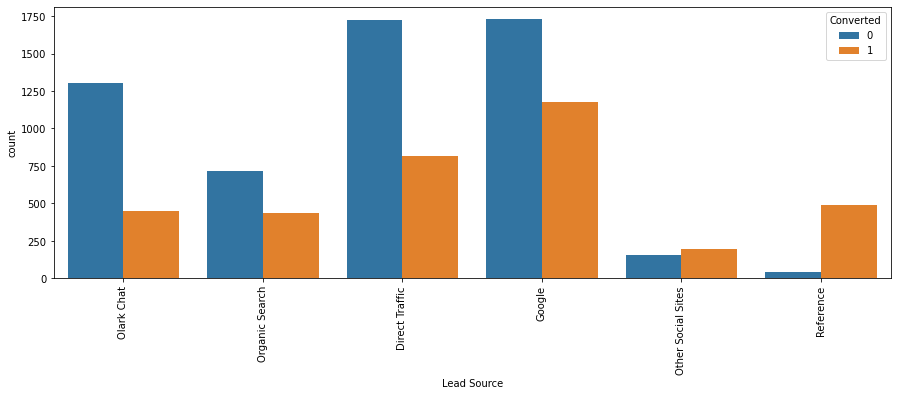

In [35]:
plt.figure(figsize=(15,5))
vis=sns.countplot(lead_score_ds['Lead Source'], hue=lead_score_ds.Converted)
vis.set_xticklabels(vis.get_xticklabels(),rotation=90)
plt.show()

In [36]:
# finding unique value
for i, j in lead_score_ds.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(i,j))

Lead Origin = 5
Lead Source = 6
Do Not Email = 2
Do Not Call = 2
Last Activity = 17
Specialization = 12
How did you hear about X Education = 10
What is your current occupation = 6
What matters most to you in choosing a course = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Tags = 27
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
Lead Profile = 6
City = 7
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


Below columns can be dropped as they contain only 1 unique value 
"Receive More Updates About Our Courses"
"Update me on Supply Chain Content"
"Get updates on DM Content"
"I agree to pay the amount through cheque"


In [37]:
cols_to_drop=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [38]:
lead_score_ds.drop(cols_to_drop, axis = 1, inplace = True)

In [39]:
#lead_score_ds['Do Not Email'].value_counts(normalize = True)*100

In [40]:
ds_bin = lead_score_ds[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations']]

In [41]:
for i in ds_bin.columns:
    x = (ds_bin[i].value_counts(normalize = True)) * 100
    print(x)

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
No     99.848485
Yes     0.151515
Name: Search, dtype: float64
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64


In [42]:
cols_to_drop_2=['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']


In [43]:
lead_score_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [44]:
lead_score_ds.drop(cols_to_drop_2, axis = 1, inplace = True)

In [45]:
lead_score_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Converted                                      9240 non-null   int64  
 3   TotalVisits                                    9103 non-null   float64
 4   Total Time Spent on Website                    9240 non-null   int64  
 5   Page Views Per Visit                           9103 non-null   float64
 6   Last Activity                                  9137 non-null   object 
 7   Specialization                                 9240 non-null   object 
 8   How did you hear about X Education             7033 non-null   object 
 9   What is your current occupation                9240 

In [46]:
# Handle missing values 
lead_score_ds.TotalVisits.fillna(lead_score_ds.TotalVisits.median(), inplace=True)
lead_score_ds['Page Views Per Visit'].fillna(lead_score_ds['Page Views Per Visit'].median(), inplace=True)
#lead_score_ds['Page Views Per Visit'].value_counts(normalize = True, dropna=False)*100
find_null(lead_score_ds).head(60)

Lead Profile                                     29.318182
How did you hear about X Education               23.885281
Last Activity                                     1.114719
What is your current occupation                   0.000000
A free copy of Mastering The Interview            0.000000
City                                              0.000000
Tags                                              0.000000
Magazine                                          0.000000
What matters most to you in choosing a course     0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Specialization                                    0.000000
Page Views Per Visit                              0.000000
Total Time Spent on Website                       0.000000
TotalVisits                                       0.000000
Converted                                         0.000000
Last Notable Activity                             0.0000

## Checking correlation of numeric attributes 

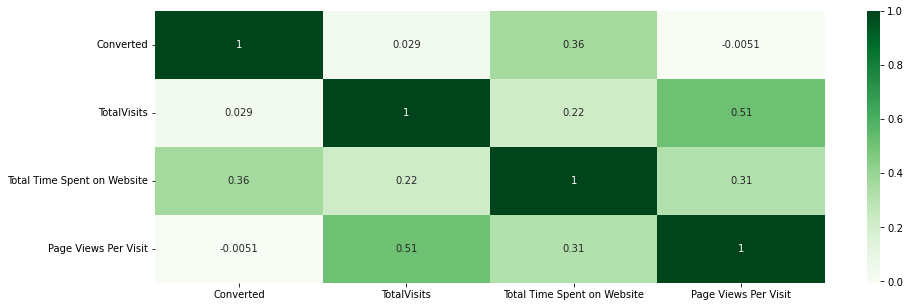

In [47]:
plt.figure(figsize=[15,5])
sns.heatmap(lead_score_ds[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].corr(),cmap="Greens",annot=True)
plt.show()

In [48]:
numerical_col = lead_score_ds.select_dtypes(include='number').columns
len(numerical_col)

4

In [49]:
outlier_col=["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

## Finding Outlier value in numberical attributes 

/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


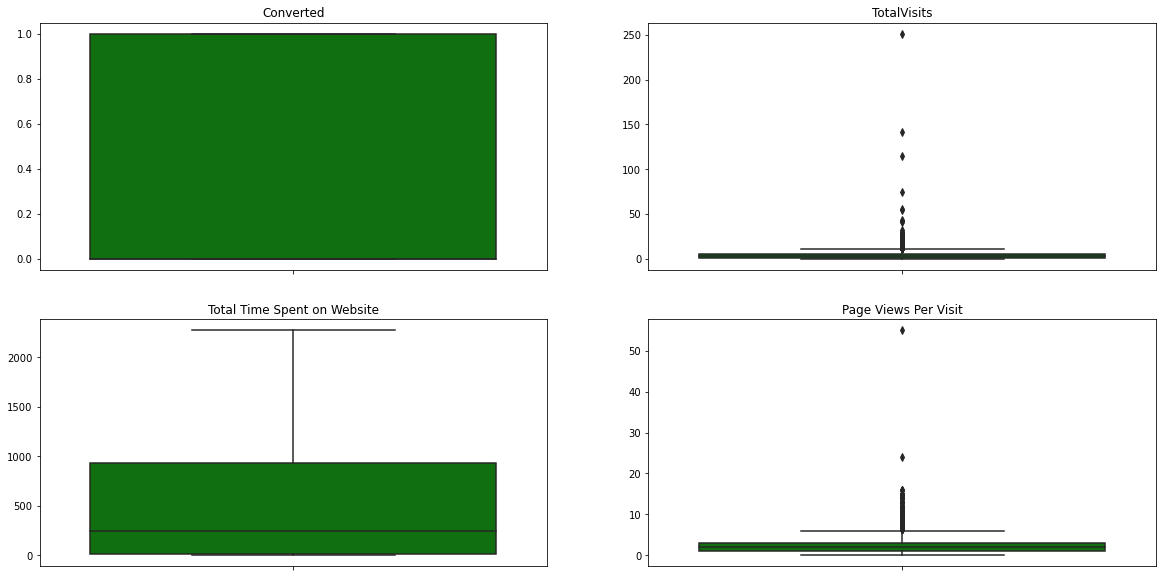

In [50]:
import itertools
plt.figure(figsize=[20,10])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(2,2,j+1)
    sns.boxplot(y = lead_score_ds[i], orient = "h", color = "green")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)


In [51]:
lead_score_ds['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [52]:
## Inference 
# No major outlier for column 'Total Time Spent on Website'

In [53]:
# check column 'TotalVisits'
lead_score_ds['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [54]:
## Outlier check remove top and bottom 1% of the column outlier values 
Q3 = lead_score_ds.TotalVisits.quantile(0.99)
Q1 = lead_score_ds.TotalVisits.quantile(0.01)
lead_score_ds[(lead_score_ds.TotalVisits <=Q3)]
lead_score_ds[(lead_score_ds.TotalVisits >=Q1)]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Magazine,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,Interested in other courses,Select,Select,No,Modified
1,API,Organic Search,0,5.0,674,2.50,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,Ringing,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,Ringing,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,Will revert after reading the email,Select,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Email Marked Spam,Management Specializations,Select,Unemployed,Better Career Prospects,No,Will revert after reading the email,Potential Lead,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Media and Advertising,Select,Unemployed,Better Career Prospects,No,wrong number given,Potential Lead,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Business Administration,Select,Unemployed,Better Career Prospects,No,invalid number,Potential Lead,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,Management Specializations,Online Search,Unemployed,Better Career Prospects,No,Not Specified,NaN,Other Metro Cities,No,SMS Sent


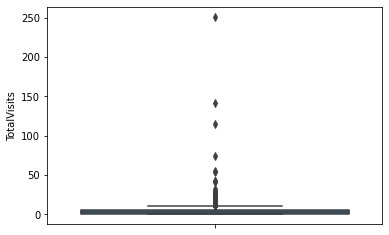

In [55]:
sns.boxplot(y=lead_score_ds['TotalVisits'])
plt.show()

In [56]:
# check column 'Page Views Per Visit'
lead_score_ds['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [57]:
## Outlier check remove top and bottom 1% of the column outlier values 
Q3 = lead_score_ds['Page Views Per Visit'].quantile(0.99)
Q1 = lead_score_ds['Page Views Per Visit'].quantile(0.01)
lead_score_ds[lead_score_ds['Page Views Per Visit'] <=Q3]
lead_score_ds[lead_score_ds['Page Views Per Visit'] >=Q1]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Magazine,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,Interested in other courses,Select,Select,No,Modified
1,API,Organic Search,0,5.0,674,2.50,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,Ringing,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,Ringing,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,Will revert after reading the email,Select,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Email Marked Spam,Management Specializations,Select,Unemployed,Better Career Prospects,No,Will revert after reading the email,Potential Lead,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Media and Advertising,Select,Unemployed,Better Career Prospects,No,wrong number given,Potential Lead,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Business Administration,Select,Unemployed,Better Career Prospects,No,invalid number,Potential Lead,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,Management Specializations,Online Search,Unemployed,Better Career Prospects,No,Not Specified,NaN,Other Metro Cities,No,SMS Sent


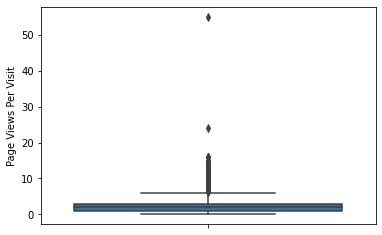

In [58]:
sns.boxplot(y=lead_score_ds['Page Views Per Visit'])
plt.show()

In [59]:
'''COLS=lead_score_ds[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]
plt.figure(figsize=[20,10])
sns.boxplot(x=COLS,y=lead_score_ds['Converted'])
plt.show()'''

"COLS=lead_score_ds[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]\nplt.figure(figsize=[20,10])\nsns.boxplot(x=COLS,y=lead_score_ds['Converted'])\nplt.show()"

## Dummy Variables

In [60]:
# List of Categorical Columns
categorical_cols=lead_score_ds.select_dtypes(include=['object']).columns
#for col in categorical_columns:
#    lead_score_ds[col] = pd.Categorical(lead_score_ds[col])
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Magazine', 'Tags',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [61]:
#Binary Column 
lead_score_ds['A free copy of Mastering The Interview'] = lead_score_ds['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [62]:
# Dummy Variable creation
dummy_var = pd.get_dummies(lead_score_ds[['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation', 'Tags','City','Last Notable Activity']], drop_first = True)

# Adding the results to the master dataframe
lead_score_ds = pd.concat([lead_score_ds, dummy_var], axis=1)
lead_score_ds.head(50)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Select,Select,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.50,Email Opened,Select,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Select,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Select,Other,Unemployed,...,0,0,1,0,0,0,0,0,0,0
5,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,NaN,Unemployed,...,0,0,1,0,0,0,0,0,0,0
6,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Management Specializations,Online Search,Unemployed,...,0,0,1,0,0,0,0,0,0,0
7,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,NaN,Unemployed,...,0,0,1,0,0,0,0,0,0,0
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,Management Specializations,NaN,Unemployed,...,0,0,0,0,0,0,0,0,0,0
9,API,Google,0,4.0,58,4.00,Email Opened,Management Specializations,Word Of Mouth,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [63]:
lead_score_ds.drop(categorical_cols,1,inplace = True)

/var/folders/3d/r7s5r8k13tjdjx5gtwp68n4m0000gn/T/ipykernel_31617/2995260626.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  lead_score_ds.drop(categorical_cols,1,inplace = True)


In [64]:
lead_score_ds.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


## Logistic Regression Model Building

In [65]:
# response variable to y
y=lead_score_ds['Converted']

In [66]:
X=lead_score_ds.drop('Converted', axis=1)

In [67]:
# splitting dataset to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 91 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   TotalVisits                                             6468 non-null   float64
 1   Total Time Spent on Website                             6468 non-null   int64  
 2   Page Views Per Visit                                    6468 non-null   float64
 3   Lead Origin_Landing Page Submission                     6468 non-null   uint8  
 4   Lead Origin_Lead Add Form                               6468 non-null   uint8  
 5   Lead Origin_Lead Import                                 6468 non-null   uint8  
 6   Lead Origin_Quick Add Form                              6468 non-null   uint8  
 7   Lead Source_Google                                      6468 non-null   uint8  
 8   Lead Source_Olark Chat             

## Feature Scaling

In [68]:
scaler = StandardScaler()

numeric_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()

/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.100767,0.005716,-0.470569,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.290067,-0.691418,0.070401,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.290067,1.365219,1.226321,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
#checking conversion rate
conversion = (sum(lead_score_ds['Converted'])/len(lead_score_ds['Converted'].index))*100
#conversion
find_null(lead_score_ds).head(60)
#lead_score_ds['TotalVisits'].value_counts(normalize = True, dropna=False)*100

Converted                                                 0.0
Tags_Recognition issue (DEC approval)                     0.0
Tags_number not provided                                  0.0
Tags_invalid number                                       0.0
Tags_in touch with EINS                                   0.0
Tags_Will revert after reading the email                  0.0
Tags_Want to take admission but has financial problems    0.0
Tags_University not recognized                            0.0
Tags_Still Thinking                                       0.0
Tags_Shall take in the next coming month                  0.0
Tags_Ringing                                              0.0
Tags_Not doing further education                          0.0
TotalVisits                                               0.0
Tags_Not Specified                                        0.0
Tags_Lost to Others                                       0.0
Tags_Lost to EINS                                         0.0
Tags_Lat

## Model Building using Stats and RFE

In [70]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP:

/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [71]:
rfe.support_

array([False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False,  True, False, False,  True, False, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 52),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 62),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', False, 21),
 ('Lead Source_Organic Search', False, 61),
 ('Lead Source_Other Social Sites', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Converted to Lead', False, 26),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Marked Spam', False, 75),
 ('Last Activity_Email Opened', False, 46),
 ('Last Activity_Email Received', False, 63),
 ('Last Activity_Form Submitted on Website', False, 45),
 ('Last Activity_Had a Phone Conversation', False, 44),
 ('Last Activity_Olark Chat Conversation', False, 25),
 ('Last Activity_Page Visited on Website', False, 27),
 

In [73]:
col = X_train.columns[rfe.support_]

In [74]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other Social Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1362.2
Date:                Sat, 15 Jul 2023   Deviance:                       2724.5
Time:                        21:37:03   Pearson chi2:                 1.49e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4362      0.188    -12.984      0.000      -2.804      -2.068
Lead Origin_Landing Page Submission         -1.4390      0.128    -11.272      0.000      -1.689      -1.189
Lead Origin_Lead Add Form                    2.2165      0.441      5.029      0.000       1.353       3.080
Lead Source_Reference                       -3.0042      0.572     -5.253      0.000      -4.125      -1.883
Last Activity_SMS Sent                       2.1768      0.113     19.189      0.000       1.954       2.399
Specialization_Not Specified                -2.0449      0.160    -12.786      0.000      -2.358      -1.731
Tags_Busy                                    2.6389      0.284      9.305      0.000       2.083       3.195
Tags_Closed by Horizzon                     10.0146      1.037      9.658      0.000       7.982      12.047
Tags_Lateral student                        23.2201   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
Tags_Lost to EINS                            8.6984      0.749     11.616      0.000       7.231      10.166
Tags_Not Specified                           2.3959      0.196     12.229      0.000       2.012       2.780
Tags_Ringing                                -1.3894      0.284     -4.885      0.000      -1.947      -0.832
Tags_Will revert after reading the email     6.8635      0.254     27.070      0.000       6.367       7.360
Tags_invalid number                         -1.7136      1.043     -1.643      0.100      -3.758       0.331
Tags_switched off                           -1.8168      0.551     -3.295      0.001      -2.897      -0.736
Last Notable Activity_Modified              -1.6176      0.119    -13.575      0.000      -1.851      -1.384
============================================================================================================
"""

## Building Logistics Regression Model 1

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1362.2
Date:                Sat, 15 Jul 2023   Deviance:                       2724.5
Time:                        21:37:03   Pearson chi2:                 1.49e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4362      0.188    -12.984      0.000      -2.804      -2.068
Lead Origin_Landing Page Submission         -1.4390      0.128    -11.272      0.000      -1.689      -1.189
Lead Origin_Lead Add Form                    2.2165      0.441      5.029      0.000       1.353       3.080
Lead Source_Reference                       -3.0042      0.572     -5.253      0.000      -4.125      -1.883
Last Activity_SMS Sent                       2.1768      0.113     19.189      0.000       1.954       2.399
Specialization_Not Specified                -2.0449      0.160    -12.786      0.000      -2.358      -1.731
Tags_Busy                                    2.6389      0.284      9.305      0.000       2.083       3.195
Tags_Closed by Horizzon                     10.0146      1.037      9.658      0.000       7.982      12.047
Tags_Lateral student                        23.2201   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
Tags_Lost to EINS                            8.6984      0.749     11.616      0.000       7.231      10.166
Tags_Not Specified                           2.3959      0.196     12.229      0.000       2.012       2.780
Tags_Ringing                                -1.3894      0.284     -4.885      0.000      -1.947      -0.832
Tags_Will revert after reading the email     6.8635      0.254     27.070      0.000       6.367       7.360
Tags_invalid number                         -1.7136      1.043     -1.643      0.100      -3.758       0.331
Tags_switched off                           -1.8168      0.551     -3.295      0.001      -2.897      -0.736
Last Notable Activity_Modified              -1.6176      0.119    -13.575      0.000      -1.851      -1.384
============================================================================================================
"""

In [77]:
# High p value column "Tags_Lateral student"
col=col.drop('Tags_Lateral student',1)

## Building Logistics Regression Model 2

In [78]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm2.fit().summary()

/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1367.5
Date:                Sat, 15 Jul 2023   Deviance:                       2735.0
Time:                        21:37:03   Pearson chi2:                 1.48e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3684      0.182    -13.013      0.000      -2.725      -2.012
Lead Origin_Landing Page Submission         -1.4494      0.127    -11.380      0.000      -1.699      -1.200
Lead Origin_Lead Add Form                    2.2087      0.440      5.017      0.000       1.346       3.071
Lead Source_Reference                       -2.9100      0.571     -5.092      0.000      -4.030      -1.790
Last Activity_SMS Sent                       2.1975      0.113     19.390      0.000       1.975       2.420
Specialization_Not Specified                -2.0515      0.160    -12.826      0.000      -2.365      -1.738
Tags_Busy                                    2.5646      0.280      9.161      0.000       2.016       3.113
Tags_Closed by Horizzon                      9.9058      1.034      9.578      0.000       7.879      11.933
Tags_Lost to EINS                            8.6270      0.747     11.544      0.000       7.162      10.092
Tags_Not Specified                           2.3245      0.190     12.210      0.000       1.951       2.698
Tags_Ringing                                -1.4734      0.281     -5.250      0.000      -2.023      -0.923
Tags_Will revert after reading the email     6.7854      0.248     27.332      0.000       6.299       7.272
Tags_invalid number                         -1.7913      1.042     -1.718      0.086      -3.835       0.252
Tags_switched off                           -1.8980      0.550     -3.454      0.001      -2.975      -0.821
Last Notable Activity_Modified              -1.6063      0.119    -13.547      0.000      -1.839      -1.374
============================================================================================================
"""

In [79]:
# High p value column "Tags_Lateral student"
#col=col.drop('Tags_invalid number',1)

## Building Logistics Regression Model 3

In [80]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm3.fit().summary()

/Users/rishita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1367.5
Date:                Sat, 15 Jul 2023   Deviance:                       2735.0
Time:                        21:37:03   Pearson chi2:                 1.48e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3684      0.182    -13.013      0.000      -2.725      -2.012
Lead Origin_Landing Page Submission         -1.4494      0.127    -11.380      0.000      -1.699      -1.200
Lead Origin_Lead Add Form                    2.2087      0.440      5.017      0.000       1.346       3.071
Lead Source_Reference                       -2.9100      0.571     -5.092      0.000      -4.030      -1.790
Last Activity_SMS Sent                       2.1975      0.113     19.390      0.000       1.975       2.420
Specialization_Not Specified                -2.0515      0.160    -12.826      0.000      -2.365      -1.738
Tags_Busy                                    2.5646      0.280      9.161      0.000       2.016       3.113
Tags_Closed by Horizzon                      9.9058      1.034      9.578      0.000       7.879      11.933
Tags_Lost to EINS                            8.6270      0.747     11.544      0.000       7.162      10.092
Tags_Not Specified                           2.3245      0.190     12.210      0.000       1.951       2.698
Tags_Ringing                                -1.4734      0.281     -5.250      0.000      -2.023      -0.923
Tags_Will revert after reading the email     6.7854      0.248     27.332      0.000       6.299       7.272
Tags_invalid number                         -1.7913      1.042     -1.718      0.086      -3.835       0.252
Tags_switched off                           -1.8980      0.550     -3.454      0.001      -2.975      -0.821
Last Notable Activity_Modified              -1.6063      0.119    -13.547      0.000      -1.839      -1.374
============================================================================================================
"""

In [81]:
# # Dataframe containing all features variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Reference,1.50
6,Tags_Closed by Horizzon,1.33
12,Tags_switched off,1.09
5,Tags_Busy,1.08
7,Tags_Lost to EINS,1.07
11,Tags_invalid number,1.03
4,Specialization_Not Specified,0.53
10,Tags_Will revert after reading the email,0.20
3,Last Activity_SMS Sent,0.13
9,Tags_Ringing,0.13


In [82]:
# Predicted values on train set 
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.021340
6795    0.185537
3516    0.021340
8105    0.043612
3934    0.160054
4844    0.994320
3297    0.005145
8071    0.994365
987     0.024064
7423    0.998647
dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02134048, 0.18553739, 0.02134048, 0.04361247, 0.16005447,
       0.99431988, 0.00514476, 0.99436507, 0.02406406, 0.99864707])

In [84]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.021340,1871
1,0,0.185537,6795
2,0,0.021340,3516
3,0,0.043612,8105
4,0,0.160054,3934


In [85]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.021340,1871,0
1,0,0.185537,6795,0
2,0,0.021340,3516,0
3,0,0.043612,8105,0
4,0,0.160054,3934,0


In [86]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

[[3834  168]
 [ 337 2129]]


In [87]:
# Accuracy of the Model 
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [88]:
print(accuracy)

0.9219233147804576


In [89]:
# Sensitivity Matrix of the Model 
# True Positive Rate 
TPR=TP/float(TP+FN)

In [90]:
# Specificity Matrix of the Model 
# True Negative Rate 
TNR=TN/float(TN+FP)
TNR

0.9580209895052474

In [91]:
# False Positive Rate 
# predicting conversion when customer does not convert 
FPR=FP/float(FP+TN)
FPR

0.041979010494752625

In [92]:
# Positive Predictive Value 
print(TP/float(TP+FP))

0.9268611232041793


In [93]:
# Negative Predictive Value 
print(TN/float(TN+FN))

0.9192040278110765


In [94]:
#ROC Curve 
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

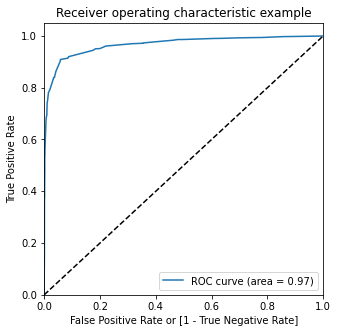

In [96]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)